In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
#C:\Users\Tru-pro\Desktop\Discrimination of Genuine and Acted Emotional Expressions using EEG Signal and Machine Learning
import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:/Users/csang/OneDrive/Desktop/Discrimination of Genuine and Acted Emotional Expressions using EEG Signal and Machine Learning/input/emotions.csv')
                # /kaggle/input/eeg-brainwave-dataset-feeling-emotions/emotions.csv')

In [4]:
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [5]:
df.isnull().sum().any()

False

In [6]:
y = df['label']

In [7]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [8]:
le = LabelEncoder()
y = le.fit_transform(y)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.decomposition import PCA

In [10]:
df.drop('label', axis = 1, inplace=True)

In [11]:
X = df

In [12]:
#Using Correlation to remove features which are highly correlated
correlated_features = set()
correlation_matrix = X.corr()
correlation_matrix



,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
# mean_0_a,1.000000,0.176578,0.429810,0.582697,0.178432,-0.000665,0.105961,-0.061046,0.135370,0.008472,...,0.301672,-0.245671,0.204764,0.204764,-0.245671,0.268983,-0.220566,0.196653,0.196653,-0.220566
mean_1_a,0.176578,1.000000,-0.007202,0.571530,0.385041,-0.088608,-0.007586,-0.050463,-0.119391,-0.017197,...,0.130717,-0.047208,0.002549,0.002549,-0.047208,0.153244,-0.096173,0.069532,0.069532,-0.096173
mean_2_a,0.429810,-0.007202,1.000000,0.081567,-0.095696,0.015122,0.014605,-0.004320,0.055625,-0.003564,...,0.699461,-0.742275,0.622567,0.622567,-0.742275,0.674195,-0.728296,0.565044,0.565044,-0.728296
mean_3_a,0.582697,0.571530,0.081567,1.000000,0.220842,-0.117748,0.124462,-0.175592,-0.001782,0.017110,...,0.133720,-0.067460,0.048202,0.048202,-0.067460,0.103294,-0.061376,0.051216,0.051216,-0.061376
mean_4_a,0.178432,0.385041,-0.095696,0.220842,1.000000,-0.017196,-0.007570,0.025546,-0.033443,-0.020361,...,-0.043602,0.069458,-0.090163,-0.090163,0.069458,-0.039620,0.056452,-0.016933,-0.016933,0.056452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fft_745_b,0.268983,0.153244,0.674195,0.103294,-0.039620,0.024944,-0.043387,0.098389,-0.022019,-0.003329,...,0.458558,-0.431711,0.415781,0.415781,-0.431711,1.000000,-0.938696,0.834622,0.834622,-0.938696
fft_746_b,-0.220566,-0.096173,-0.728296,-0.061376,0.056452,0.002976,-0.001477,-0.061713,0.005671,-0.005395,...,-0.493145,0.531019,-0.459876,-0.459876,0.531019,-0.938696,1.000000,-0.815108,-0.815108,1.000000
fft_747_b,0.196653,0.069532,0.565044,0.051216,-0.016933,-0.017169,0.003350,0.149472,-0.040408,0.003422,...,0.375438,-0.355117,0.499272,0.499272,-0.355117,0.834622,-0.815108,1.000000,1.000000,-0.815108
fft_748_b,0.196653,0.069532,0.565044,0.051216,-0.016933,-0.017169,0.003350,0.149472,-0.040408,0.003422,...,0.375438,-0.355117,0.499272,0.499272,-0.355117,0.834622,-0.815108,1.000000,1.000000,-0.815108


In [13]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

#Total number of correlated features
print(len(correlated_features))
#Printing features that are correlated
print(correlated_features)



1916
{'fft_56_b', 'fft_685_b', 'fft_571_a', 'covmat_103_a', 'min_q_23_b', 'fft_730_b', 'fft_483_b', 'fft_55_a', 'covmat_1_b', 'fft_136_a', 'fft_444_b', 'fft_501_b', 'covmat_25_a', 'fft_87_a', 'fft_111_a', 'min_q_8_b', 'fft_281_b', 'fft_481_b', 'fft_327_a', 'fft_554_a', 'correlate_6_b', 'covmat_97_a', 'fft_260_a', 'fft_442_a', 'fft_459_a', 'mean_d_23_b', 'fft_591_b', 'fft_695_b', 'fft_171_a', 'fft_666_b', 'covmat_89_b', 'correlate_7_b', 'fft_173_a', 'fft_622_b', 'fft_728_a', 'fft_145_b', 'fft_673_b', 'fft_498_b', 'fft_651_a', 'fft_441_b', 'fft_104_b', 'fft_129_b', 'correlate_25_b', 'fft_357_a', 'fft_659_a', 'fft_18_b', 'min_3_b', 'fft_312_b', 'fft_263_a', 'fft_430_b', 'fft_553_a', 'stddev_2_b', 'fft_267_b', 'fft_321_a', 'fft_674_a', 'fft_27_b', 'fft_200_b', 'covmat_50_b', 'fft_385_a', 'fft_176_b', 'fft_363_a', 'fft_103_b', 'fft_683_a', 'fft_227_b', 'fft_394_b', 'fft_575_a', 'fft_629_b', 'fft_372_a', 'fft_488_b', 'fft_157_a', 'fft_53_b', 'fft_554_b', 'fft_288_b', 'fft_333_a', 'fft_663_a'

In [14]:
#Droping columns that are correlated
X.drop(labels=correlated_features, axis=1, inplace=True)

In [15]:
X.shape
# We are left with 632 columns

(2132, 632)

In [16]:
X_array = np.array(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_array, y, test_size = 0.3)

In [18]:
#PCA
pca_result = PCA(n_components=25)
pca_result.fit_transform(X)
for index, var in enumerate(pca_result.explained_variance_ratio_):
    print("Explained Variance ratio by Principal Component ", (index+1), " : ", var)

Explained Variance ratio by Principal Component  1  :  0.8019051794534983
Explained Variance ratio by Principal Component  2  :  0.19785591307535896
Explained Variance ratio by Principal Component  3  :  0.00019890303304873744
Explained Variance ratio by Principal Component  4  :  3.84408892275972e-05
Explained Variance ratio by Principal Component  5  :  1.3010088738418531e-06
Explained Variance ratio by Principal Component  6  :  2.6251316786977074e-07
Explained Variance ratio by Principal Component  7  :  2.3977299809365936e-11
Explained Variance ratio by Principal Component  8  :  2.633011469169025e-12
Explained Variance ratio by Principal Component  9  :  1.4047192022633986e-13
Explained Variance ratio by Principal Component  10  :  4.891552502856586e-14
Explained Variance ratio by Principal Component  11  :  1.1616708911340525e-14
Explained Variance ratio by Principal Component  12  :  5.903980563899618e-15
Explained Variance ratio by Principal Component  13  :  4.403085936300979

In [19]:
#Voting Classifier Ensemble Technique
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)
vc_eclf1_y_pred = eclf1.predict(X_test)
print("Accuracy VC_eclf1:",accuracy_score(y_test,vc_eclf1_y_pred))


eclf2 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='soft')
eclf2 = eclf2.fit(X, y)
vc_eclf2_y_pred = eclf2.predict(X_test)
print("Accuracy VC_eclf2:",accuracy_score(y_test,vc_eclf2_y_pred))

eclf3 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='soft', weights=[2,1,1],flatten_transform=True)
eclf3 = eclf3.fit(X, y)
vc_eclf3_y_pred = eclf3.predict(X_test)
print("Accuracy VC_eclf3:",accuracy_score(y_test,vc_eclf3_y_pred))

eclf4 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='soft', weights=[1,2,1],flatten_transform=True)
eclf4 = eclf4.fit(X, y)
vc_eclf4_y_pred = eclf4.predict(X_test)
print("Accuracy VC_eclf4:",accuracy_score(y_test,vc_eclf4_y_pred))

eclf5 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='soft', weights=[1,1,2],flatten_transform=True)
eclf5 = eclf5.fit(X, y)
vc_eclf5_y_pred = eclf5.predict(X_test)
print("Accuracy VC_eclf5:",accuracy_score(y_test,vc_eclf5_y_pred))

#Random forest is giving us the maximum accuracy from pool of Logistic Regression, Random Forest and Naive Bayes.

Accuracy VC_eclf1: 0.946875
Accuracy VC_eclf2: 0.8765625
Accuracy VC_eclf3: 0.8765625
Accuracy VC_eclf4: 1.0
Accuracy VC_eclf5: 0.4796875


In [20]:
## Pipelines Creation
    ## 1. Data Preprocessing by using Standard Scaler
    ## 2. Reduce Dimension using PCA
    ## 3. Apply  Classifier

In [21]:
#Logistic Regression Pipeline with PCA
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=25)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [22]:
#Linear Support Vector Classifier Pipeline with PCA
pipeline_svc_pca=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=25)),
                     ('svm_cl', LinearSVC())])

In [23]:
#Random Forest Pipeline with PCA
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=25)),
                     ('rf_classifier',RandomForestClassifier())])

In [24]:
#Random Forest Pipeline without PCA
pipeline_randomforest_pca=Pipeline([('scalar3',StandardScaler()),
                     ('rf_classifier',RandomForestClassifier())])

In [25]:
#Linear Support Vector Classifier without PCA
svm_c = Pipeline(steps=[('scaler',StandardScaler()),
                             ('svm_cl', LinearSVC())])

In [26]:
#XGBoost Pipeline with PCA
pl_xgb_pca = Pipeline(steps=
                  [('pca4', PCA(n_components=25)) ,('xgboost', xgb.XGBClassifier(objective='multi:softmax'))])

In [27]:
#XGBoost Pipeline without PCA
pl_xgb = Pipeline(steps=
                  [('xgboost', xgb.XGBClassifier(objective='multi:softmax'))])

In [28]:
pipelines = [pipeline_lr, pipeline_svc_pca, pipeline_randomforest, pipeline_randomforest_pca,  svm_c, pl_xgb_pca, pl_xgb ]

best_accuracy=0.0
best_classifier=0
best_pipeline=""

pipe_dict = {0: 'Logistic Regression with PCA', 1: 'Support Vector with PCA', 2: 'RandomForest with PCA', 3: 'RandomForest without PCA', 4: 'Support Vector without PCA', 5: 'XGBoost with PCA', 6: 'XGBoost without PCA'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

[18:49:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:49:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Logistic Regression with PCA Test Accuracy: 0.9203125
Support Vector with PCA Test Accuracy: 0.9015625
RandomForest with PCA Test Accuracy: 0.9140625
RandomForest without PCA Test Accuracy: 0.990625
Support Vector without PCA Test Accuracy: 0.95
XGBoost with PCA Test Accuracy: 0.903125
XGBoost without PCA Test Accuracy: 0.9921875


In [29]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy: {}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy: XGBoost without PCA


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Logistic Regression with PCA'),
  Text(1, 0, 'Support Vector with PCA'),
  Text(2, 0, 'RandomForest with PCA'),
  Text(3, 0, 'RandomForest without PCA'),
  Text(4, 0, 'Support Vector without PCA'),
  Text(5, 0, 'XGBoost with PCA'),
  Text(6, 0, 'XGBoost without PCA')])

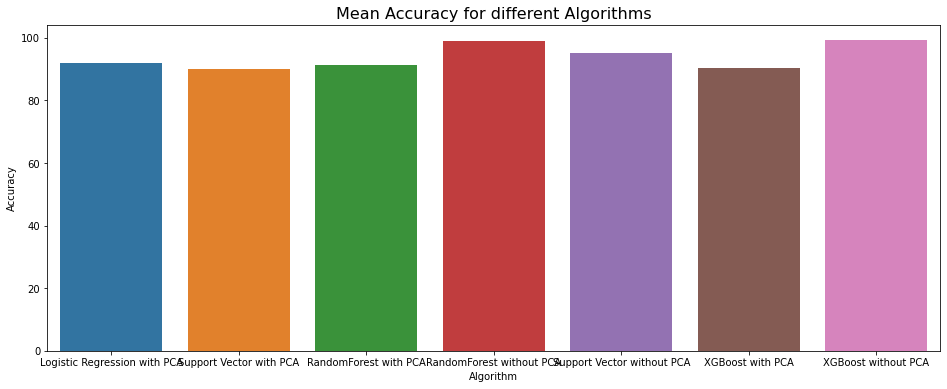

In [30]:
algo = []
accuracy = []
for i,model in enumerate(pipelines):
    algo.append(pipe_dict[i])
    accuracy.append((model.score(X_test,y_test))* 100)
accuracy_df = pd.DataFrame(list(zip(algo,accuracy)), index  = [0,1,2,3,4,5,6], 
                                              columns =['Algorithm', 'Accuracy']) 
plt.figure(figsize=(16,6))
sns.barplot(x="Algorithm", y="Accuracy", data=accuracy_df)
plt.title('Mean Accuracy for different Algorithms', fontsize=16)
plt.ylabel('Accuracy', fontsize=10)
plt.xlabel('Algorithm', fontsize=10)
plt.xticks(rotation='horizontal')